In [2]:
import io
import os
import numpy as np
import h5py
import PIL
import matplotlib.pyplot as plt


In [3]:
data_path = '~/data/UAV123.hdf5'
voc_path = os.path.expanduser(data_path)
uav_123 = h5py.File(voc_path, 'r')

In [4]:
train_boxes = []
dataset = ['train', 'valid']
# explore the train/valid set
for d in dataset:
    for i in range(uav_123[d + '/boxes'].shape[0]):
        image = PIL.Image.open(io.BytesIO(uav_123[d + '/images'][i]))
        orig_size = np.array([image.width, image.height])
        orig_size = np.expand_dims(orig_size, axis=0)
        boxes = uav_123[d + '/boxes'][i]
        boxes = boxes.reshape((-1, 5))
        # normalize the bound box sizes
        boxes_wh = boxes[:, 3:5] - boxes[:, 1:3]
        boxes_wh = boxes_wh / orig_size
        boxes = np.concatenate((boxes_wh, boxes[:, 0:1]), axis=1)
        boxes = boxes.tolist()
        for b in boxes:
            train_boxes.append(b)

In [5]:
train_boxes = np.array(train_boxes)
person_boxes = train_boxes[train_boxes[:,2] < 0.5]
vechile_boxes = train_boxes[train_boxes[:,2] > 0.5]

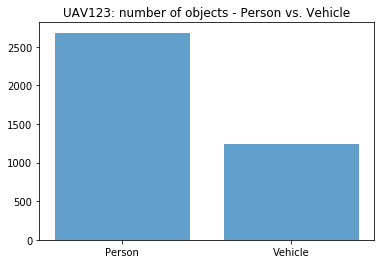

In [6]:
objects = ('Person', 'Vehicle')
y_pos = np.arange(len(objects))
num_objects = (person_boxes.shape[0], vechile_boxes.shape[0])
plt.bar(y_pos, num_objects, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.title('UAV123: number of objects - Person vs. Vehicle')
plt.show()

In [7]:
area_person = person_boxes[:, 0:1] * person_boxes[:, 1:2]
area_vehicle = vechile_boxes[:, 0:1] * vechile_boxes[:, 1:2]
area_person_mean = np.mean(area_person)
area_vehicle_mean = np.mean(area_vehicle)
print('Mean area: person {}, vehicle {}'.format(round(area_person_mean, 3), round(area_vehicle_mean, 3)))

Mean area: person 0.008, vehicle 0.011


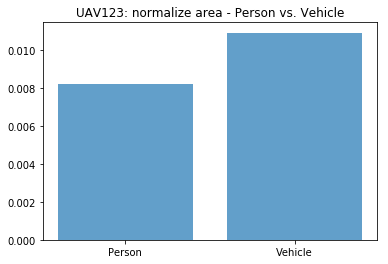

In [8]:
objects = ('Person', 'Vehicle')
y_pos = np.arange(len(objects))
areas = (area_person_mean, area_vehicle_mean)
plt.bar(y_pos, areas, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.title('UAV123: normalize area - Person vs. Vehicle')
plt.show()

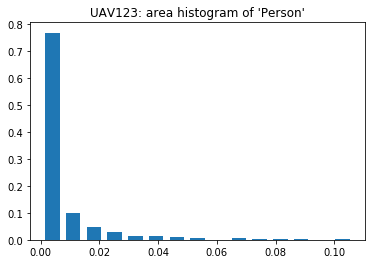

In [9]:
hist, bins = np.histogram(area_person,  bins=15)
normalized_hist = hist / float(area_person.shape[0])
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, normalized_hist, align='center', width=width)
plt.title('UAV123: area histogram of \'Person\'')
plt.show()

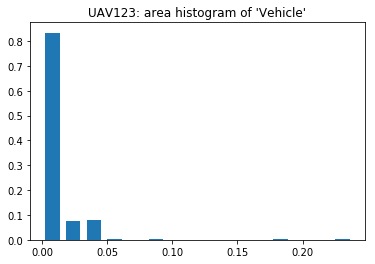

In [11]:
hist, bins = np.histogram(area_vehicle,  bins=15)
normalized_hist = hist / float(area_vehicle.shape[0])
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, normalized_hist, align='center', width=width)
plt.title('UAV123: area histogram of \'Vehicle\'')
plt.show()